# Clustering
This is a brief introduction into k-means clustering with python sklearn. We use the digits dataset.

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances_argmin_min

## Load and Prepare Data

### look at the data
At first, let's look at the dataset. Luckily, the digits-dataset comes with a nice desciption.

In [52]:
digits = load_digits()

print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### reduce the dimensions
Digits data has 64 (7px * 7px) features. We want to reduce them at first to a dimensionality, that we can easily visualize.

In [53]:
reduced_data = PCA(n_components=2).fit_transform(scale(digits.data))

## Build the Clustering model
Now, we can calculate a K-Means clustering.

At first, we always build and initiate a model. K-Means is a flat clustering technique. 

For this reason, at first, we need to determine a number of clusters (here 10, for 0 to 9 digits)

In [23]:
# What is the number of different digit values? (here 10)
n_digits = len(np.unique(digits.target))

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

After everything is built up, we run it on the (PCA-reduced dataset)

In [27]:
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Visualization


([], <a list of 0 Text yticklabel objects>)

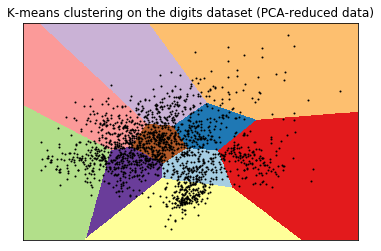

In [36]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Finally, let's enquire, whether our clusters make sense. This might help us to name them afterwards.

In order to do so, we might look at a representative example from each cluster, for instance the cluster centroids.

Show images of data points closest to centroids
True value:6


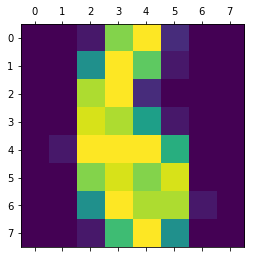

True value:1


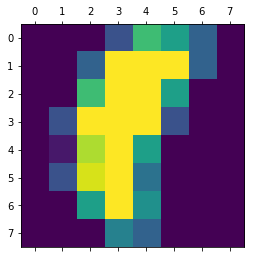

True value:3


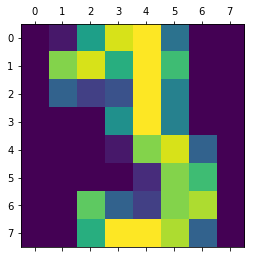

True value:8


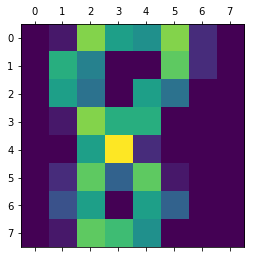

True value:4


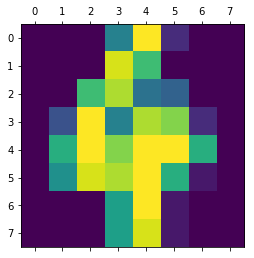

True value:7


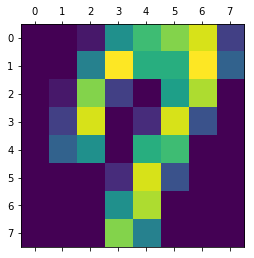

True value:7


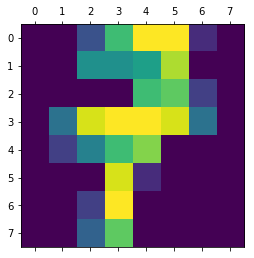

True value:5


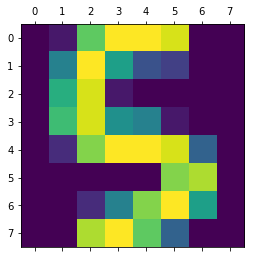

True value:6


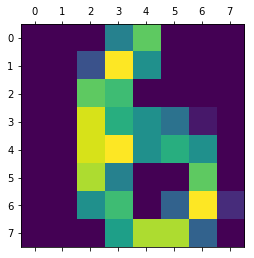

True value:7


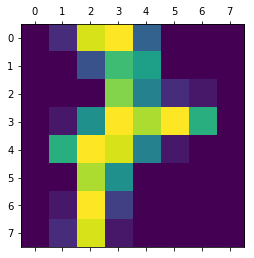

In [41]:
centroids = kmeans.cluster_centers_

print('Show images of data points closest to centroids')
for cl in closest:
    plt.matshow(digits.images[cl])
    print("True value:"+str(digits.target[cl]))
    plt.show()
